In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [4]:
# standardize the data.
ss_X = StandardScaler()
X_ss = ss_X.fit_transform(X)
ss_y = StandardScaler()
y_ss = ss_y.fit_transform(np.array(y).reshape(-1, 1))
X_ss = pd.DataFrame(X_ss, columns=["alpha1", "alpha2", "alpha3", "alpha4", "alpha5", "alpha6", "alpha7"])
y_ss = pd.DataFrame(y_ss, columns=["return"])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, np.ravel(y_ss), random_state=10)

In [6]:
param_grid = {"hidden_layer_sizes":[(2, 2), (3, 3), (5, 5), (10, 10)]}
print("Parameters:{}".format(param_grid))
grid_search = GridSearchCV(MLPRegressor(solver='adam', activation='tanh', max_iter=5000),param_grid,cv=10)
# Train to find the optimal parameters, and use the optimal parameters to instantiate a new neutral network
grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'hidden_layer_sizes': [(2, 2), (3, 3), (5, 5), (10, 10)]}
Test set score:0.04
Best parameters:{'hidden_layer_sizes': (3, 3)}
Best score on train set:0.01


Text(0, 0.5, 'Price')

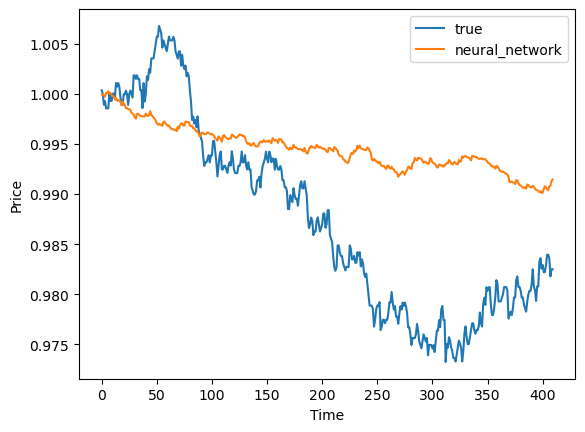

In [7]:
ml = MLPRegressor(solver='adam', activation='tanh', hidden_layer_sizes = (3, 3), max_iter=5000)
ml.fit(X_train, y_train)
y_pre = ss_y.inverse_transform(ml.predict(X_test).reshape(-1, 1))
cash = [[1], [1]]
for i in range(len(y_test)):
    cash[0].append(cash[0][-1]*(1 + ss_y.inverse_transform(y_test.reshape(-1, 1))[i]))
    cash[1].append(cash[1][-1]*(1 + y_pre[i]))
plt.plot(range(len(y_test)), cash[0][1:], label = "true")
plt.plot(range(len(y_test)), cash[1][1:], label = "neural_network")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")

In [8]:
import joblib
joblib.dump(ml, 'saved_model/ml.pkl')

['saved_model/ml.pkl']